<a href="https://colab.research.google.com/github/jessy235/Simulacion-II/blob/main/Muestreo_importancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
librerias a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

definimos la funcion f(X):

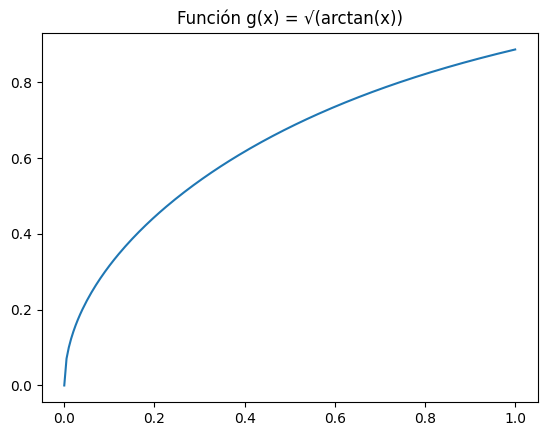

In [4]:
def g(x):
    return np.sqrt(np.arctan(x))

# Ver la forma de la función
X = np.linspace(0, 1, 200)
plt.plot(X, g(X))
plt.title("Función g(x) = √(arctan(x))")
plt.show()

monte carlo crudo:

In [5]:
def mc_crudo(N):
    u = np.random.rand(N)     # valores entre 0 y 1
    G = g(u)
    return np.mean(G), np.var(G), np.std(G)

In [ ]:
Monte Carlo con variable de control:

In [6]:
def mc_control(N):
    u = np.random.rand(N)
    x = g(u)
    y = u                     # variable de control con E[Y]=0.5
    c = np.cov(x, y, ddof=1)[0, 1] / np.var(y, ddof=1)
    z = x - c * (y - 0.5)     # corrección
    return np.mean(z), np.var(z), np.std(z)

Comparar resultados:

Varianza MC crudo: 4.452065951199787e-05
Varianza MC con variable de control: 3.2306846351133433e-06
Reducción de la varianza: 92.74%


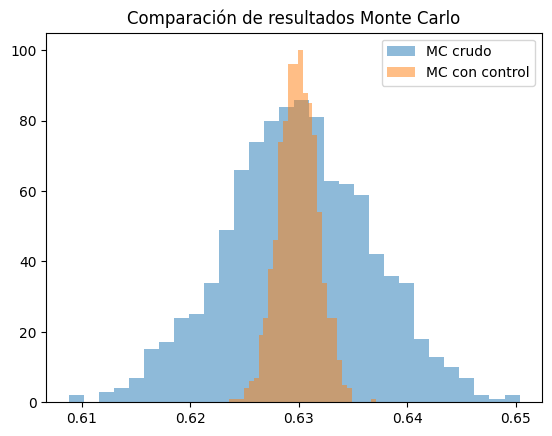

In [7]:
def comparar(num_reps=1000, N=1000):
    resultados_crudo = [mc_crudo(N)[0] for _ in range(num_reps)]
    resultados_control = [mc_control(N)[0] for _ in range(num_reps)]

    var_crudo = np.var(resultados_crudo, ddof=1)
    var_control = np.var(resultados_control, ddof=1)
    reduccion = (1 - var_control / var_crudo) * 100

    print("Varianza MC crudo:", var_crudo)
    print("Varianza MC con variable de control:", var_control)
    print(f"Reducción de la varianza: {reduccion:.2f}%")

    # Gráfica comparativa
    plt.hist(resultados_crudo, bins=30, alpha=0.5, label="MC crudo")
    plt.hist(resultados_control, bins=30, alpha=0.5, label="MC con control")
    plt.legend()
    plt.title("Comparación de resultados Monte Carlo")
    plt.show()

comparar()